## Libraries

In [8]:
%matplotlib inline

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.font_manager import FontProperties
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D

# Dynamical Systems

## What is a dynamical system?

> Any set of any nature, whose state can be described by various quantities that vary over time.

<img src="img/dynamical_systems_examples.png" alt="Dynamical systems examples" width="500" height="500" />

In order to strictly define a dynamical system we must:

- Define the **state variables**

> A **state variable** is one of the set of variables that are used to describe the **mathematical "state"** of a dynamical system. Intuitively, the state of a system describes enough about the system to **determine** its future behaviour in the absence of any external forces affecting the system.

$$ \underbrace{x, y, z, ...}_{\text{State variables}} := \{ q_{i} \}$$

- Define the **mathematical model**, also referred as **evolution equations** or **equations of motion**

> The **equations of motion** states how the system evolves as time goes by.

$$ \Delta x = f_{1} (x, y, z, ...; t) $$

$$ \Delta y = f_{2} (x, y, z, ...; t) $$

$$ \Delta z = f_{3} (x, y, z, ...; t) $$

$$ \vdots $$

## Determinism and predictability

It is possible to demonstrate that the equations of motion have a single solution as long as there exists prescribed initial data.

> By the [existence and uniqueness theorem](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem) one can asure that trajectories in phase space do not intersect.

In this sense, the state $\{ q_{i} (t_{0}) \}$ of a system at any time $t_{0}$ completely determines the solution $\{ q_{i} (t_{0}) \}$ for any time $t$.

### Determinism

> A **deterministic system** is a system in which the later states of the system follow from, or
are determined by, the earlier ones

i.e. the **equations of motion** (mathematical rules) are completely determined. Such a system contrasts with a **stochastic** or **random system** in which future states are not determined from previous ones. An example of a stochastic system would be the sequence of heads or tails of an unbiased coin, or radioactive decay.

#### Caution:

> If a system is deterministic, this doesn't necessarily imply that later states of the system are
**predictable** from a knowledge of the earlier ones.

### ... Chaos enters to scene

No definition of the term **chaos** is universally accepted yet, but almost everyone would agree on the three ingredients used in the following working definition:

> **Chaos** is aperiodic long-term behavior in a deterministic system that exhibits sensitive dependence on initial conditions.

1. **Aperiodic long-term behavior** means that there are trajectories which do not settle down to fixed points, periodic orbits, or quasiperiodic orbits as $t \to \infty$ .

For practical reasons, we should require that such trajectories are not too rare. For instance, we could insist that there be an open set of initial conditions leading to aperiodic trajectories, or perhaps that such trajectories should occur with nonzero probability, given a random initial condition.


2. **Deterministic** means that the system has no random or noisy inputs or parameters. The irregular behavior arises from the system's nonlinearity, rather than from noisy driving forces.


3. **Sensitive dependence on initial conditions** means that nearby trajectories separate exponentially fast.

---

In general, systems with **chaotic behaviour** often show the existence of an **strange attractor** in phase space.

An **attractor** is a closed set $A$ with the following properties:

1. $A$ is an invariant set

> Any trajectory $\vec{x}(t)$ that starts in $A$ stays in $A$ for all time.

2. $A$ attracts an open set of initial conditions

> There is an open set $U$ containing $A$ such that if $\vec{x}(t_{0}) \in U$, then the distance from $\vec{x}(t)$ to $A$ tends to zero as $t \to \infty$. This means that $A$ attracts all trajectories that start sufficiently close to it. The largest such $U$ is called the basin of attraction of $A$.

3. $A$ is minimal

> There is no proper subset of $A$ that satisfies conditions **1** and **2**.

We define a **strange attractor** to be an attractor that exhibits sensitive dependence on initial conditions. **Strange attractors** were originally called strange because they are often **fractal sets**. 

<img src="img/chaotic_fractal_set_1.gif" alt="Chaotic fractal set 1" width="500" height="500" />

<img src="img/chaotic_fractal_set_2.gif" alt="Chaotic fractal set 2" width="400" height="400" />

Nowadays this geometric property is regarded as less important than the dynamical property of sensitive dependence on initial conditions.

### Exponential Divergence of Nearby Trajectories

The motion on the attractor exhibits sensitive dependence on initial conditions.

This means that two trajectories starting very close together will rapidly diverge from each other, and thereafter have totally different futures.

<img src="img/spread_in_phase_space.png" alt="spread in phase space" width="400" />

Hence nearby trajectories can end up anywhere on the attractor.

The practical implication is that long-term prediction becomes impossible in a system like this, where **small uncertainties are amplified enormously fast**.

Suppose that we let transients decay, so that a trajectory is "on" the attractor. Suppose $\vec{x}(t)$ is a point on the attractor at time $t$, and consider a nearby point, say $\vec{x}(t) + \delta (t)$, where $\delta$ is a tiny separation vector of initial length $\| \delta_{0} \|$:

<img src="img/initial_separation.png" alt="initial separation" width="400" />

In numerical studies, one finds that

$$ \| \delta (t) \| \sim \| \delta_{0} \| e^{\lambda \, t}$$

Hence neighboring trajectories separate exponentially fast. Equivalently, if we plot $\ln \| \delta (t) \|$ versus $t$, we find a curve that is close to a straight line with a positive slope of $\lambda$

<img src="img/initial_separation_log.png" alt="log initial separation" width="400" />

When a system has a **positive Liapunov exponent**, there is a **time horizon** beyond which prediction breaks down:

<img src="img/time_horizon.png" alt="time horizon" width="400" />

### Predictability

<img src="img/predictability.png" alt="Predictability" width="450" height="450" />


> Chaos is similar to a random system in the sense it lacks of long term predictability, however a random system also lacks of short term predictability. 

Chaos has been termed "deterministic chaos" since, although it is determined by simple rules, its property of sensitive dependence on initial conditions makes a chaotic system, in practice, largely unpredictable.

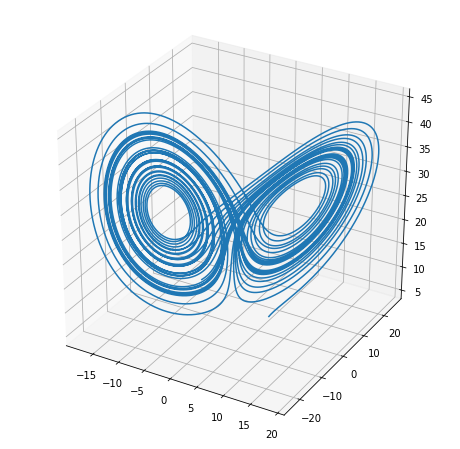

In [7]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def lorenz(state, t):
    x, y, z = state  # unpack the state vector
    
    # derivatives
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    
    return dx, dy, dz

state_0 = [5.0, 5.0, 4.0]
t = np.arange(0.0, 40.0, 0.001)

states = odeint(lorenz, state_0, t)

fig = plt.figure(figsize = (8,8))

ax = fig.gca(projection = '3d')

ax.plot(states[:,0], states[:,1], states[:,2])

plt.show()